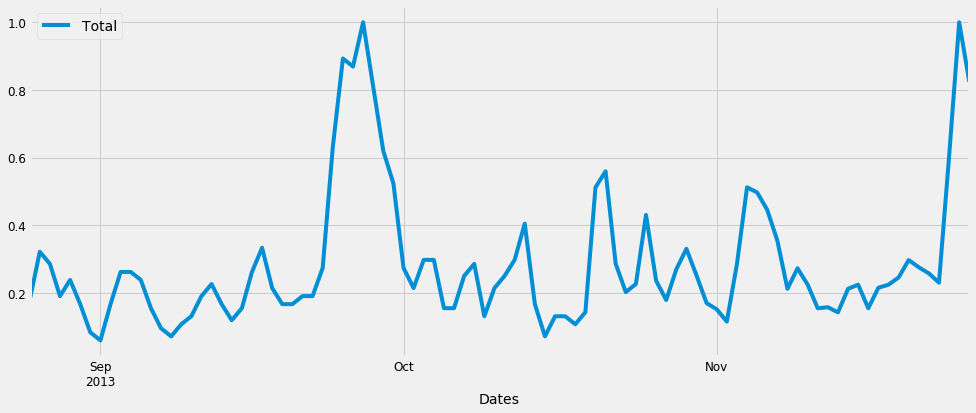

In [78]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults 
import matplotlib
from datetime import datetime

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

total_df = pd.read_excel("Sudan20132019.xlsx")

dates = total_df['Dates']
totalHits=total_df['Total']
# check missing values
dates.isnull().sum()
totalHits.isnull().sum()

df = total_df.loc[total_df['Dates'] < '2013-11-27']
df.set_index('Dates', inplace=True) 
df.plot(figsize=(15, 6))
plt.show()


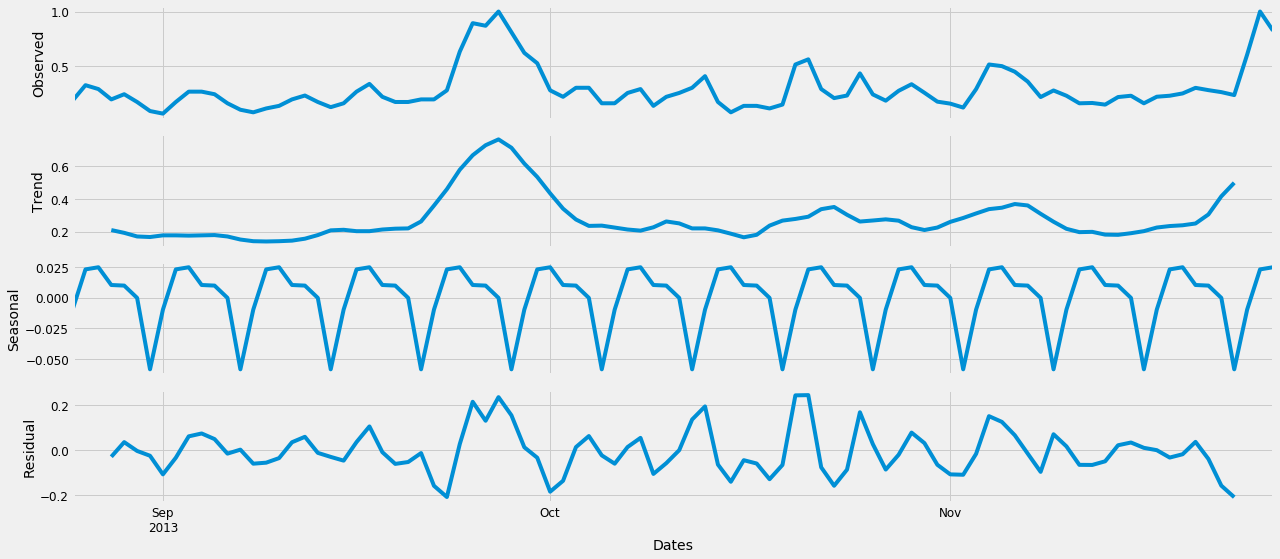

In [79]:
y=df

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


In [80]:
p = d = q = range(0, 7)
pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [81]:
for param in pdq:
    try:
        mod = ARIMA(y, order=param)

        results = mod.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

ARIMA(0, 0, 0) - AIC:-30.25983041181425
ARIMA(0, 0, 1) - AIC:-118.0007563477929
ARIMA(0, 1, 0) - AIC:-119.53089441121023
ARIMA(0, 1, 1) - AIC:-128.25038645200766
ARIMA(0, 1, 2) - AIC:-135.20905331274918
ARIMA(0, 1, 3) - AIC:-133.53774715679413
ARIMA(0, 1, 4) - AIC:-138.0622729048709
ARIMA(0, 1, 5) - AIC:-136.07600614782382
ARIMA(0, 2, 0) - AIC:-77.51418563719793
ARIMA(0, 2, 1) - AIC:-111.0646374289617
ARIMA(0, 2, 2) - AIC:-120.16698386041116
ARIMA(0, 2, 3) - AIC:-126.47509201529397
ARIMA(1, 0, 0) - AIC:-124.7423991796357
ARIMA(1, 0, 1) - AIC:-144.92308482438006
ARIMA(1, 0, 2) - AIC:-143.49325740798304
ARIMA(1, 0, 3) - AIC:-142.2837244394525
ARIMA(1, 0, 4) - AIC:-140.55113893059593
ARIMA(1, 1, 0) - AIC:-121.91758669476906
ARIMA(1, 1, 1) - AIC:-133.682725066351
ARIMA(1, 1, 2) - AIC:-139.79655098072317
ARIMA(1, 1, 3) - AIC:-138.5758695298373
ARIMA(1, 2, 0) - AIC:-78.60617818901892
ARIMA(1, 2, 1) - AIC:-113.66014352730673
ARIMA(1, 2, 2) - AIC:-125.31291018822805
ARIMA(1, 2, 3) - AIC:-126.8

In [82]:
mod = ARIMA(y, order=(0,0,0))
#mod = sm.tsa.statespace.ARIMAX(y,
                               # order=(1, 1, 1),
                              #  order=(0, 0, 0),
                               # seasonal_order=(0, 1, 1, 12),
                               # enforce_stationarity=False,
                               # enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2865      0.021     13.773      0.000       0.246       0.327


In [83]:
#results.plot_diagnostics(figsize=(16, 8))
#plt.show()

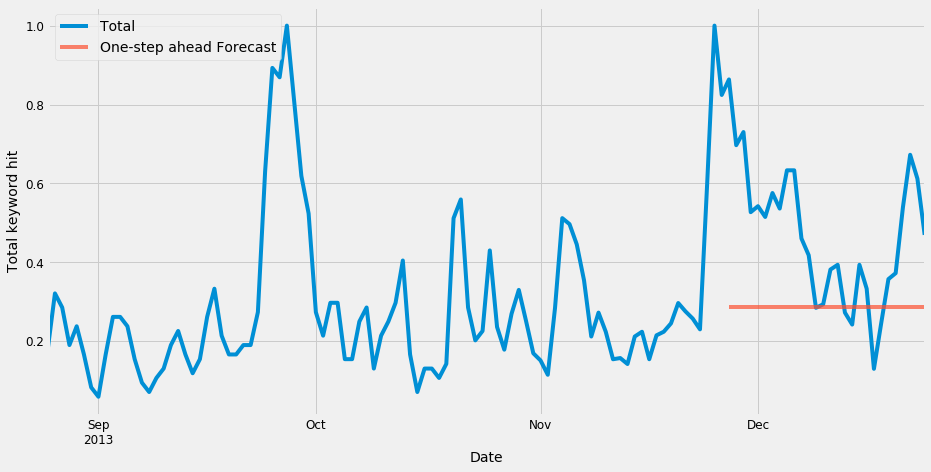

In [84]:
total_df.set_index('Dates', inplace=True) 
# Prediction
pred = results.predict(start=pd.to_datetime('2013-11-27'), end=pd.to_datetime('2013-12-24'), dynamic=False)
pred_ci = results.conf_int()
ax = total_df['2013-08-25':].plot(label='observed')
pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,
             #   pred_ci.iloc[:, 0],
            #    pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total keyword hit')
plt.legend()
plt.show()